#### Mandatory Imports :)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Creating 5 linear samples

In [2]:
x = [2,3,4,5,6]

In [3]:
y = [2 + np.sin(i) for i in x]

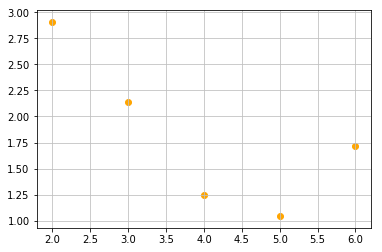

In [4]:
plt.scatter(x,y,color = 'orange')
plt.grid(color = 'silver')
plt.show()

## Linear Regression_1 : using SkLearn

In [5]:
x_df = pd.DataFrame(x)
y_df = pd.DataFrame(y)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
regressor = LinearRegression()

In [8]:
regressor.fit(x_df,y_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_pred = regressor.predict(x_df)

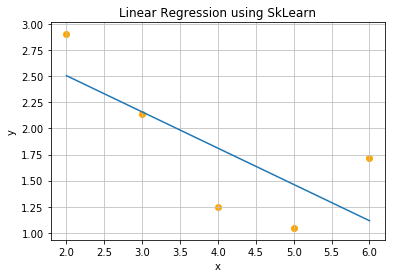

In [10]:
plt.scatter(x_df,y_df, label = 'y', color= 'orange')
plt.plot(x_df,y_pred)
plt.xlabel("x")
plt.ylabel('y')
plt.title("Linear Regression using SkLearn")
plt.grid(color= 'silver')
plt.show()

## Cost by SkLearn

In [11]:
cost_sk = [0.5*((i-j)**2) for i,j in zip(y_pred,y)]

In [12]:
round(sum(cost_sk)[0],4)

0.5147

## Regression_2 : using Formula

### Standard equation of line y = mx + c

###          m = Σ (x - x̅) * (y - y̅) ∕ Σ (x - x̅)²
###          c = y̅ - m*x̅

In [13]:
x_minus_x_mean = [i-np.mean(x) for i in x]

In [14]:
y_minus_y_mean = [j-np.mean(y) for j in y]

In [15]:
x_minus_x_mean_square = [k**2 for k in x_minus_x_mean]

In [16]:
m = sum([i*j for i,j in zip(x_minus_x_mean, y_minus_y_mean)])/(sum(x_minus_x_mean_square))

In [17]:
c = np.mean(y) - m*np.mean(x)

In [18]:
m

-0.34774701327722213

In [19]:
c

3.202043086452

In [20]:
y_hat = [m*i + c for i in x]

In [21]:
y_hat

[2.506549059897556,
 2.1588020466203335,
 1.8110550333431115,
 1.4633080200658894,
 1.115561006788667]

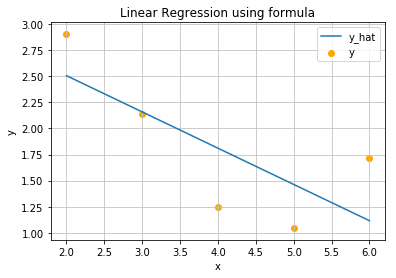

In [22]:
plt.scatter(x,y ,label = 'y', color = 'orange')
plt.xlabel("x")
plt.ylabel('y')
plt.title("Linear Regression using formula")
plt.plot(x, y_hat, label = 'y_hat')
plt.legend()
plt.grid(color = 'silver')
plt.show()

## Cost using Formula method

In [23]:
cost_fml = [0.5*((i-j)**2) for i,j in zip(y_hat,y)]

In [24]:
round(sum(cost_fml),4)

0.5147

## Regression_3: using Gradient Descent

In [25]:
def gradient_descent(alpha, no_of_iterations, x, y):
    theta_0 = np.random.randn()
    theta_1 = np.random.randn()
    m = len(x)
    h_theta_x = [theta_0 + theta_1*i for i in x]
    iterations = 0
    # Apply gradient descent
    for i in range(no_of_iterations):
        cost1 = (1/2*m)*sum([(i-j)**2 for i,j in zip(h_theta_x,y)])
        theta_0 = theta_0 - alpha*(1/m)*sum([i-j for i,j in zip(h_theta_x,y)])
        theta_1 = theta_1 - alpha*(1/m)*sum([(i-j)*k for i,j,k in zip(h_theta_x,y,x)])
        h_theta_x = [theta_0 + theta_1*i for i in x]
        cost2 = (1/2*m)*sum([(i-j)**2 for i,j in zip(h_theta_x,y)])
        iterations = iterations + 1
        if cost1 - cost2 <= 0.0000000001:
            break
        else:
            continue
            
    return [[theta_0,theta_1],iterations]

In [26]:
optimal_thetas, iterations = gradient_descent(alpha = 0.1,no_of_iterations = 1000, x = x, y = y)

In [27]:
h_theta_x = [optimal_thetas[0] + optimal_thetas[1]*i for i in x]

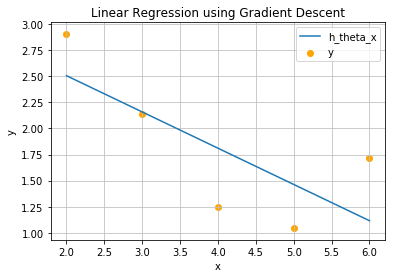

In [28]:
plt.scatter(x,y, label = 'y', color = 'orange')
plt.xlabel("x")
plt.ylabel('y')
plt.title("Linear Regression using Gradient Descent")
plt.plot(x,h_theta_x, label = 'h_theta_x')
plt.legend()
plt.grid(color = 'silver')
plt.show()

## Cost by Gradient Descent

In [29]:
cost_gd = [0.5*((i-j)**2) for i,j in zip(h_theta_x,y)]

In [30]:
round(sum(cost_gd),4)

0.5147